## **2. Exploratory Data Analysis**

Building on EDA 1's findings that conflict-affected regions show accelerated solar capacity growth (0 to 8,000+ MW over 15 years), this second exploration focuses exclusively on **conflict-affected countries** to understand how different **phases of conflict** influence solar photovoltaic deployment patterns.

In this data exploration, we will examine the same cleaned dataset but filter it to analyze only conflict-affected countries and their solar energy development across different conflict phases. The analysis follows a structured approach:

**Data Preparation**: Filtering to conflict-affected countries only, conflict phase labeling, and focused data quality checks for solar energy metrics.

 Conflicted- Affected Countries (9) in the past _25 years_: **Syria, Iraq, Sudan, South Sudan, Ethiopia, Ukraine, Yemen, Libya, Afghanistan**  
Based on this [**research document**](https://docs.google.com/document/d/1uxgQp8gesLcbfaCGLQAHn3Kgvyu2ZDGxgG-LSWEfq8s/edit?tab=t.0#heading=h.eeoohb5d7fi7) the phases of the 9 conflict countries were added.

**Key Analysis Areas**:
- **Conflict Phase Mapping**: Categorizing each country-year into Pre-Conflict, Active Conflict, and Post-Conflict phases
- **Solar Capacity by Phase**: Examining how solar deployment varies across different conflict phases
- **Country-Specific Patterns**: Analyzing individual country trajectories through conflict phases
- **Temporal Phase Analysis**: Understanding timing relationships between conflict events and solar infrastructure development
- **Capacity Variation Analysis**: Investigating high vs. low capacity patterns within conflict-affected regions

**Purpose**: To reveal how different phases of armed conflict specifically influence solar photovoltaic system deployment, capacity utilization, and development patterns within conflict-affected communities, providing insights into the complex relationship between conflict dynamics and renewable energy infrastructure.


In [21]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Visualization settings
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

In [22]:
# 2. Load Dataset

url = "https://raw.githubusercontent.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/ongrid_analysis/1_datasets/cleaned_data/IRENA_ONGRIDStats.cleaned.xlsx"
df = pd.read_excel(url, engine="openpyxl")

In [23]:
# 3. Quick Preview
print(df.head())
print("Shape of dataset:", df.shape)

   Region       Sub-region  Country ISO3 code         RE or Non-RE  \
0  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
1  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
2  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
3  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
4  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   

  Group Technology   Technology Sub-Technology        Producer Type  Year  \
0     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2000   
1     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2001   
2     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2002   
3     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2003   
4     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2004   

   Electricity Installed Capacity (MW) Conflict_Status  
0                              5459.01    Non-Conflict  
1 

In [24]:
# 4. Working with Conflict countries only
# Drop all rows where conflict_status == "non-conflict"
df = df[df["Conflict_Status"] != "Non-Conflict"]

# Optional: reset the index after filtering
df = df.reset_index(drop=True)

# Delete conflict column
df = df.drop(columns=["Conflict_Status"])


# Display the result
df.head()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,930.0
1,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,930.0
2,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2002,1095.0
3,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2003,1095.0
4,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2004,1095.0


In [25]:
# 5. Phases labeling:   Pre-Conflict, Conflict, Post-Conflict
# marking each row (per country, per year) in a separate file
# Make a copy of the full DataFrame
labeled_df = df.copy()

In [26]:
#'Year' column is integer
labeled_df["Year"] = labeled_df["Year"].astype(int)

In [27]:
conflict_phases = {
    "Iraq": {
        "pre-conflict": range(2000, 2003),  # 2000–2002
        "active-conflict": range(2003, 2018),  # 2003–2017
        "post-conflict": range(2018, 2025),  # 2018–2024
    },
    "Afghanistan": {
        "pre-conflict": range(2000, 2001),  # 2000
        "active-conflict": range(2001, 2022),  # 2001–2021
        "post-conflict": range(2022, 2025),  # 2022–2024
    },
    "Libya": {
        "pre-conflict": range(2000, 2011),  # 2000–2010
        "active-conflict": [2011] + list(range(2014, 2021)),  # 2011, 2014–2020
        "transitional": range(2012, 2014),  # 2012–2013
        "post-conflict": range(2021, 2025),  # 2021–2024
    },
    "Yemen": {
        "pre-conflict": range(2000, 2014),  # 2000–2013
        "active-conflict": range(2014, 2025),  # 2014–2024
    },
    "Ukraine": {
        "pre-conflict": range(2000, 2014),  # 2000–2013
        "active-conflict": range(2014, 2025),  # 2014–2024
    },
    "Ethiopia": {
        "pre-conflict": range(2000, 2020),  # 2000–2019
        "active-conflict": range(2020, 2023),  # 2020–2022
        "post-conflict": range(2023, 2025),  # 2023–2024
    },
    "South Sudan": {
        "pre-conflict": range(2000, 2012),  # 2000–2011
        "active-conflict": range(2013, 2021),  # 2013–2020
        "post-conflict": range(2021, 2025),  # 2021–2024
        "transitional": [2012],  # Independence year
    },
    "Sudan (the)": {  # Fixed: Changed from "Sudan" to "Sudan (the)" to match your data
        "pre-conflict": range(2000, 2003),  # 2000–2002
        "active-conflict": list(range(2003, 2006))
        + list(range(2019, 2022))
        + list(range(2023, 2025)),
        "transitional": list(range(2006, 2019)) + [2022],  # e.g. 2006–2018 + 2022
    },
    "Syrian Arab Republic (the)": {
        "pre-conflict": range(2000, 2011),  # 2000–2010
        "active-conflict": range(2011, 2025),  # 2011–2024 (ongoing)
    },
}


def assign_conflict_phase(row):
    country = row["Country"]
    year = row["Year"]

    # Check if the country has defined phases
    if country in conflict_phases:
        for phase, years in conflict_phases[country].items():
            if year in years:
                return phase
        return "unknown"  # No phase matched, though country exists
    else:
        return "non-conflict"  # Country not in the dictionary


# Apply the function to assign the phase
labeled_df["Conflict Phase"] = labeled_df.apply(assign_conflict_phase, axis=1)

In [28]:
# 7. SAVE FILE
# Filter only rows that are in a conflict phase
conflict_only_df = labeled_df[
    labeled_df["Conflict Phase"].isin(
        ["pre-conflict", "active-conflict", "post-conflict"]
    )
]
conflict_only_df.to_excel(
    "../1_datasets/cleaned_data/ONG_conflictcountriesonly.xlsx", index=False
)

In [29]:
# 8. Basic Info and Summary
print(labeled_df.info())
print(labeled_df.describe())
print("Columns:", labeled_df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               1064 non-null   object 
 1   Sub-region                           1064 non-null   object 
 2   Country                              1064 non-null   object 
 3   ISO3 code                            1064 non-null   object 
 4   RE or Non-RE                         1064 non-null   object 
 5   Group Technology                     1064 non-null   object 
 6   Technology                           1064 non-null   object 
 7   Sub-Technology                       1064 non-null   object 
 8   Producer Type                        1064 non-null   object 
 9   Year                                 1064 non-null   int32  
 10  Electricity Installed Capacity (MW)  1064 non-null   float64
 11  Conflict Phase                

In [30]:
# 9. Missing Values
print("Missing values per column:")
print(labeled_df.isnull().sum())

Missing values per column:
Region                                 0
Sub-region                             0
Country                                0
ISO3 code                              0
RE or Non-RE                           0
Group Technology                       0
Technology                             0
Sub-Technology                         0
Producer Type                          0
Year                                   0
Electricity Installed Capacity (MW)    0
Conflict Phase                         0
dtype: int64


In [31]:
# 10. Unique Value Checks (Sanity Check)
print("Number of Countries:", labeled_df["Country"].nunique())
print("Year Range:", labeled_df["Year"].min(), "-", labeled_df["Year"].max())
print("Years:", sorted(labeled_df["Year"].unique()))
print("Producer Types:", labeled_df["Producer Type"].unique())
print("RE Categories:", labeled_df["RE or Non-RE"].unique())

Number of Countries: 9
Year Range: 2000 - 2024
Years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Producer Types: ['On-grid electricity' 'Off-grid electricity']
RE Categories: ['Total Non-Renewable' 'Total Renewable']


In [32]:
df = labeled_df
df["Country"].value_counts()
df["Year"].min(), df["Year"].max()

(2000, 2024)

In [33]:
# 11. Value Distributions
print(df["Country"].value_counts())
print(df["Conflict Phase"].value_counts())

Country
Ukraine                       182
Ethiopia                      171
Afghanistan                   151
Sudan (the)                   130
Syrian Arab Republic (the)    125
Iraq                          110
Yemen                          84
Libya                          74
South Sudan                    37
Name: count, dtype: int64
Conflict Phase
active-conflict    527
pre-conflict       342
post-conflict      115
transitional        80
Name: count, dtype: int64


In [34]:
df.head()
df.tail()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Conflict Phase
1059,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,1257.77,active-conflict
1060,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,1402.00,active-conflict
1061,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1761.00,active-conflict
1062,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,1761.00,active-conflict
1063,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2023,1761.00,active-conflict


In [35]:
# 12. General Trends
# Filter for Solar PV only
solar_df = df[df["Group Technology"].str.contains("Solar")]

All countries in our data: ['Afghanistan' 'Ethiopia' 'Iraq' 'Libya' 'South Sudan' 'Sudan (the)'
 'Syrian Arab Republic (the)' 'Ukraine' 'Yemen']
High capacity countries: ['Ukraine']
Low capacity countries: ['Afghanistan', 'Ethiopia', 'Iraq', 'Libya', 'South Sudan', 'Sudan (the)', 'Syrian Arab Republic (the)', 'Yemen']


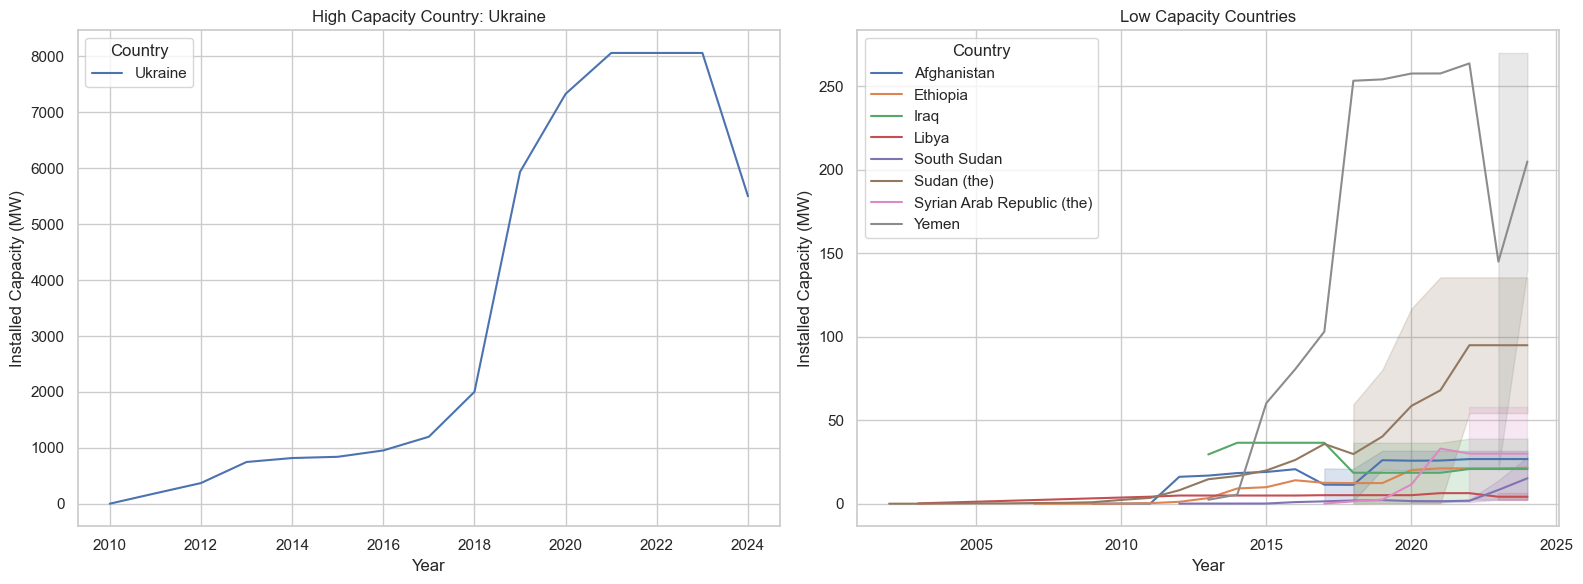

In [41]:
# 13. High vs Low Capacity
# Ukraine has much higher capacity than others, so we separate it
high_capacity_countries = ["Ukraine"]

# Getting all unique country names from our data
all_countries = solar_df["Country"].unique()
print("All countries in our data:", all_countries)

# Creating a list of countries that are NOT Ukraine (the low capacity ones)
low_capacity_countries = []
for country in all_countries:
    if country != "Ukraine":  # If it's not Ukraine
        low_capacity_countries.append(country)  # Add it to low capacity list

print("High capacity countries:", high_capacity_countries)
print("Low capacity countries:", low_capacity_countries)

# Then creating two graphs side by side to see difference
fig, (left_graph, right_graph) = plt.subplots(1, 2, figsize=(16, 6))
# 1 = one row, 2 = two columns, figsize makes it wide enough for both

# The LEFT graph (for high capacity countries)
# Filter our data to only include Ukraine
ukraine_data = solar_df[solar_df["Country"] == "Ukraine"]

# Plotting Ukraine's data on the left graph
sns.lineplot(
    data=ukraine_data,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Country",
    ax=left_graph,
)

# Adding labels to the left graph
left_graph.set_title("High Capacity Country: Ukraine")
left_graph.set_ylabel("Installed Capacity (MW)")
left_graph.set_xlabel("Year")

# The RIGHT graph (for low capacity countries)
# Filter our data to exclude Ukraine (keep all others)
other_countries_data = solar_df[solar_df["Country"] != "Ukraine"]

# Plotting all other countries 8 on the right graph
sns.lineplot(
    data=other_countries_data,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Country",
    ax=right_graph,
)

# Add labels to the right graph
right_graph.set_title("Low Capacity Countries")
right_graph.set_ylabel("Installed Capacity (MW)")
right_graph.set_xlabel("Year")

plt.tight_layout()
plt.show()

# - Left graph: Ukraine's dramatic growth (large numbers)
# - Right graph: All other countries (smaller numbers, but now visible!)

**Key Finding:** _Ukraine's solar energy_ capacity is dramatically higher than all other countries in the dataset, with over _8,000 MW_ by 2024 compared to less than _250 MW_ for any other country. This 30-40x difference is so extreme that Ukraine must be analyzed separately from other countries (Libya, Syria, Sudan, Ethiopia, South Sudan, Afghanistan, Iraq, Yemen) to make meaningful comparisons, as Ukraine's exponential growth from 2016-2022 completely dominates the scale and obscures patterns in the remaining countries.

In [37]:
# 14. SOLAR ENERGY DATAFRAME
solar_df = df[
    df["RE or Non-RE"].str.contains("Total Renewable", case=False, na=False)
    & df["Group Technology"].str.contains("Solar energy", case=False, na=False)
].copy()

solar_df.head()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Conflict Phase
50,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2003,0.2,pre-conflict
51,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2004,0.7,pre-conflict
52,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2005,1.2,pre-conflict
53,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2006,1.7,pre-conflict
54,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2007,2.2,pre-conflict


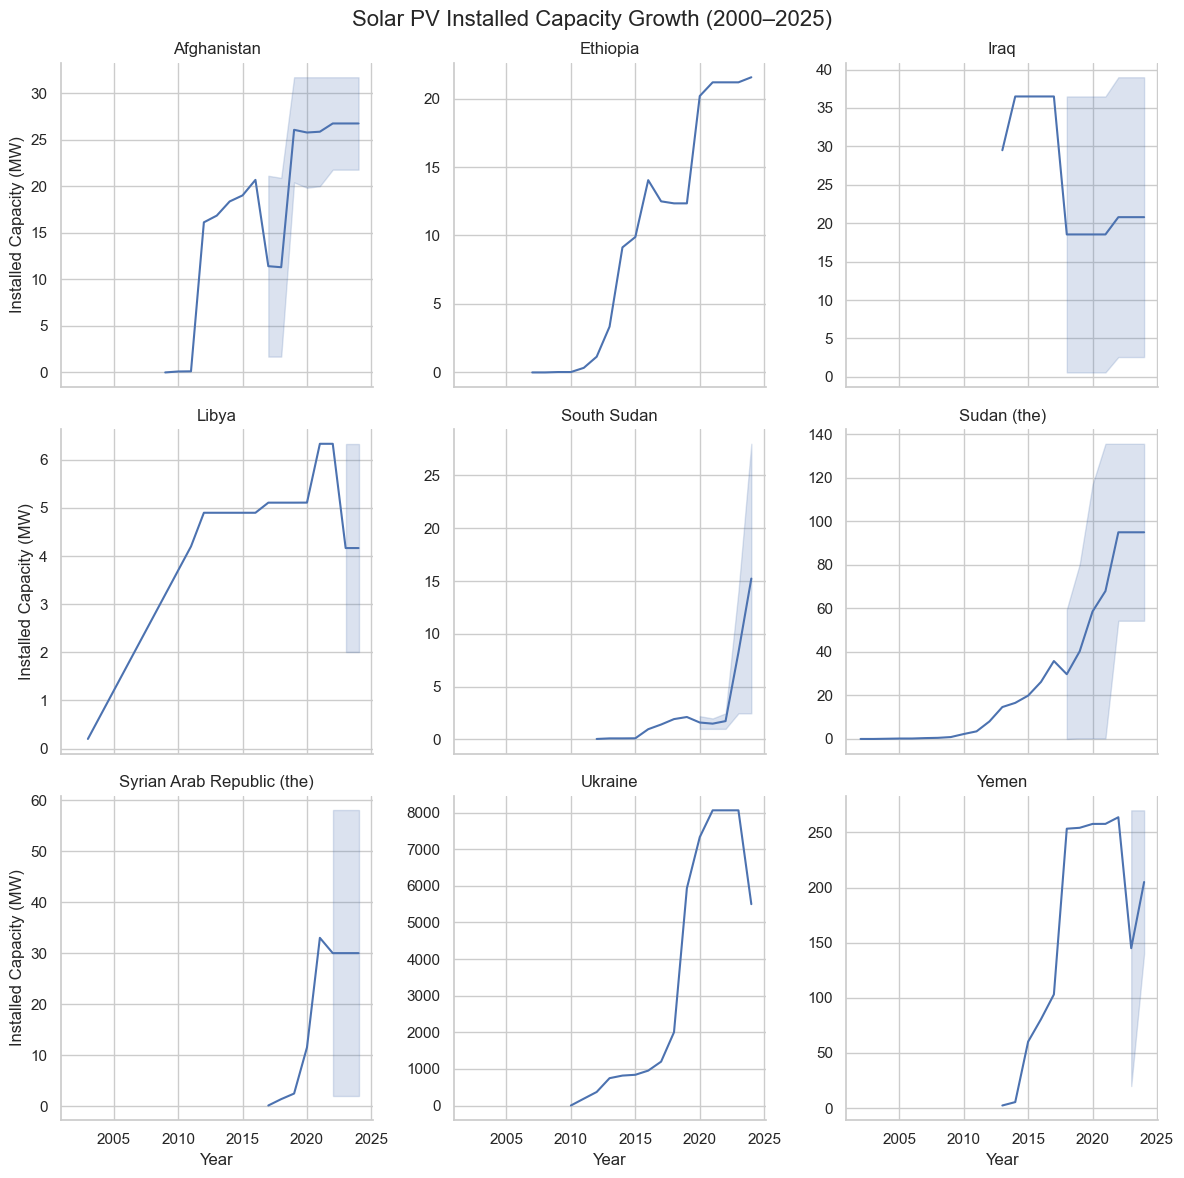

In [38]:
# 15. Plotting Solar PV Capacity Growth per country

# Sort just in case
solar_df = solar_df.sort_values(by=["Country", "Year"])

# Set plot style
sns.set(style="whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(solar_df, col="Country", col_wrap=3, height=4, sharey=False)

# Map lineplot to each subplot
g.map_dataframe(sns.lineplot, x="Year", y="Electricity Installed Capacity (MW)")

# Formatting
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Installed Capacity (MW)")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Solar PV Installed Capacity Growth (2000–2025)", fontsize=16)
plt.tight_layout()
plt.show()

 All these countries have experienced conflict or political instability, yet they still managed to build significant solar power capacity, with Ukraine reaching over 8,000 MW and Yemen hitting 250+ MW despite ongoing wars. The data shows that even in conflict zones, governments prioritize renewable energy development, but the growth patterns are highly volatile - countries can rapidly build solar capacity during stable periods but face sharp declines when conflicts intensify, demonstrating both the resilience of renewable energy investment and its vulnerability to disruption in unstable regions.

**Key Finding:** The individual country plots reveal distinct solar energy development patterns and timelines across the dataset.

 **Ukraine** shows the most dramatic growth trajectory, rising exponentially from near-zero to _8,000 MW between 2016-2022 before declining._
 **Yemen** demonstrates the second-highest peak capacity (~250 MW) with rapid growth around 2020 followed by a sharp decline.   
 **Sudan** shows steady, consistent growth reaching ~100 MW by 2025.  
 Most other countries (**Afghanistan, Ethiopia, Iraq, Libya, South Sudan**) exhibit much smaller-scale development with capacities under 50 MW, often with periods of stagnation or decline. 
 
 The visualization effectively demonstrates that solar capacity development varies dramatically not just in scale but also in timing and sustainability, with some countries experiencing rapid buildups followed by capacity losses while others maintain steady growth patterns.

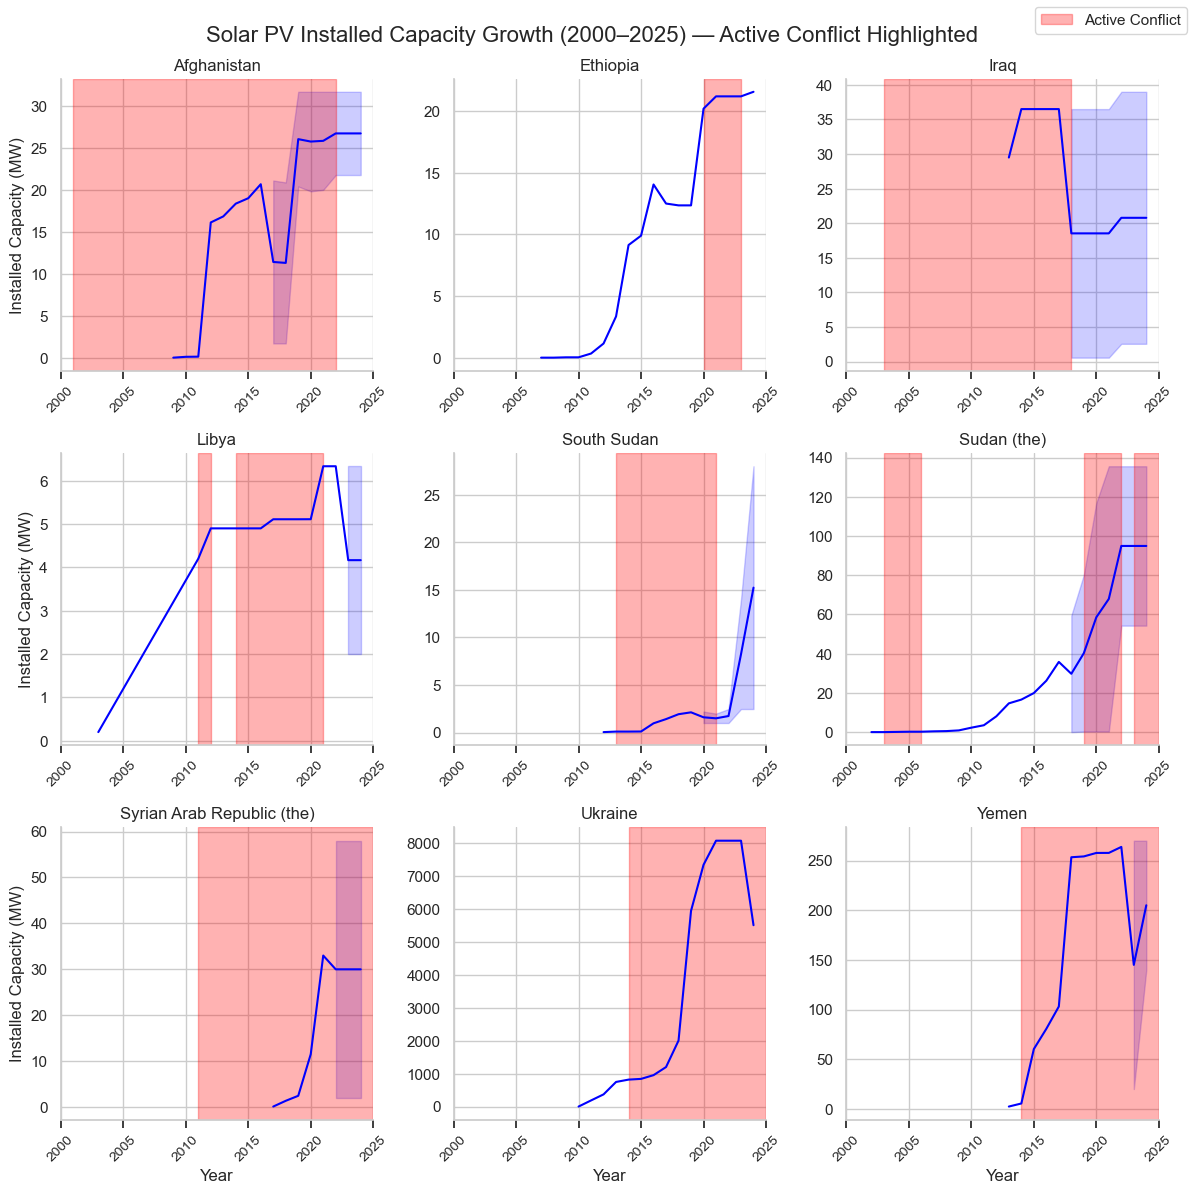

In [ ]:
# 16. SOLAR PV CAPACITY GROWTH WITH CONFLICT PERIODS HIGHLIGHTED
# This code creates a chart showing solar power growth in different countries
# Blue lines = solar capacity growth
# Red shaded areas = periods of active conflict

# Step 1: Sort the data by country and year
solar_df = solar_df.sort_values(by=["Country", "Year"])

# Step 2: Set up the chart style (makes it look clean)
sns.set_style("whitegrid")

# Step 3: Create multiple small charts (one for each country)
# col_wrap=3 means 3 charts per row
# height=4 makes each chart 4 inches tall
g = sns.FacetGrid(solar_df, col="Country", col_wrap=3, height=4, sharey=False)

# Step 4: Draw blue lines showing solar capacity growth
g.map_dataframe(
    sns.lineplot, x="Year", y="Electricity Installed Capacity (MW)", color="blue"
)

# Step 5: Add formatting to each individual chart
countries = solar_df["Country"].unique()  # Get list of all countries

for chart, country in zip(g.axes.flat, countries):
    # Make the year labels easier to read
    chart.tick_params(axis="x", rotation=45, labelsize=10)
    chart.set_xticks(
        range(2000, 2026, 5)
    )  # Show years: 2000, 2005, 2010, 2015, 2020, 2025
    chart.set_xticklabels(range(2000, 2026, 5))

    # Set the time range from 2000 to 2025
    chart.set_xlim(2000, 2025)

    # Add red shading for conflict periods (if data exists)
    if country in conflict_phases:
        # Get the years when this country had active conflict
        conflict_years = conflict_phases.get(country, {}).get("active-conflict", [])

        if conflict_years:  # If there are conflict years
            # Convert range objects to lists if needed
            if hasattr(conflict_years, "__iter__") and not isinstance(
                conflict_years, list
            ):
                conflict_years = list(conflict_years)

            # Handle cases where conflict_years might be a mix of ranges and lists
            all_conflict_years = []
            for year_item in conflict_years:
                if isinstance(year_item, int):
                    all_conflict_years.append(year_item)
                else:
                    all_conflict_years.extend(list(year_item))

            # If we have continuous periods, create separate spans
            if all_conflict_years:
                # Sort the yearsA
                all_conflict_years = sorted(set(all_conflict_years))

                # Group consecutive years into continuous periods
                periods = []
                current_start = all_conflict_years[0]
                current_end = all_conflict_years[0]

                for i in range(1, len(all_conflict_years)):
                    if all_conflict_years[i] == current_end + 1:
                        current_end = all_conflict_years[i]
                    else:
                        periods.append((current_start, current_end))
                        current_start = all_conflict_years[i]
                        current_end = all_conflict_years[i]

                # Add the last period
                periods.append((current_start, current_end))

                # Add red shading for each continuous period
                for start_year, end_year in periods:
                    chart.axvspan(
                        start_year,  # Start of conflict period
                        end_year
                        + 1,  # End of conflict period (add 1 to include the end year)
                        color="red",  # Red color
                        alpha=0.3,  # Make it semi-transparent
                        label="Active Conflict"
                        if start_year == periods[0][0]
                        else "",  # Only label first span
                    )

# Step 6: Make sure all charts show year labels at the bottom
for chart in g.axes.flat:
    chart.tick_params(axis="x", which="both", bottom=True, labelbottom=True)

# Step 7: Add titles and labels
g.set_titles("{col_name}")  # Each chart gets the country name as title
g.set_axis_labels("Year", "Installed Capacity (MW)")  # Label the axes

# Step 8: Add a legend explaining what the red shading means
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color="red", alpha=0.3, label="Active Conflict")
g.fig.legend(handles=[red_patch], loc="upper right")

# Step 9: Add spacing and main title
g.fig.subplots_adjust(top=0.85, bottom=0.15)  # Make room for titles and labels
g.fig.suptitle(
    "Solar PV Installed Capacity Growth (2000–2025) — Active Conflict Highlighted",
    fontsize=16,
)

# Step 10: Show the final chart
plt.tight_layout()
plt.show()

**Key Finding:** 
*The charts reveal a striking pattern where solar PV capacity growth is significantly disrupted during periods of active conflict across multiple countries. In several cases, solar capacity development either stagnates completely or experiences dramatic declines during conflict periods (highlighted in red), with recovery occurring only after conflicts end. This pattern is particularly evident in countries like Iraq, Libya, Syria, Sudan, and Yemen, where conflict periods coincide with either minimal solar development or actual capacity losses, suggesting that armed conflict represents a major barrier to renewable energy infrastructure development and maintenance.*

The visualization effectively demonstrates how geopolitical instability directly impacts a country's ability to build and maintain clean energy infrastructure, with solar capacity growth typically resuming or accelerating only during periods of relative peace and stability.

Countries in our dataset: ['Afghanistan' 'Ethiopia' 'Iraq' 'Libya' 'South Sudan' 'Sudan (the)'
 'Syrian Arab Republic (the)' 'Ukraine' 'Yemen']
Total countries: 9

Creating 3 rows × 3 columns grid for 9 countries

Processing Afghanistan (position 1/9)
  - Peak capacity: 32 MW in 2019

Processing Ethiopia (position 2/9)
  - Peak capacity: 22 MW in 2024

Processing Iraq (position 3/9)
  - Peak capacity: 39 MW in 2022

Processing Libya (position 4/9)
  - Peak capacity: 6 MW in 2021

Processing South Sudan (position 5/9)
  - Peak capacity: 28 MW in 2024

Processing Sudan (the) (position 6/9)
  - Peak capacity: 136 MW in 2021

Processing Syrian Arab Republic (the) (position 7/9)
  - Peak capacity: 58 MW in 2022

Processing Ukraine (position 8/9)
  - Peak capacity: 8062 MW in 2021

Processing Yemen (position 9/9)
  - Peak capacity: 270 MW in 2023


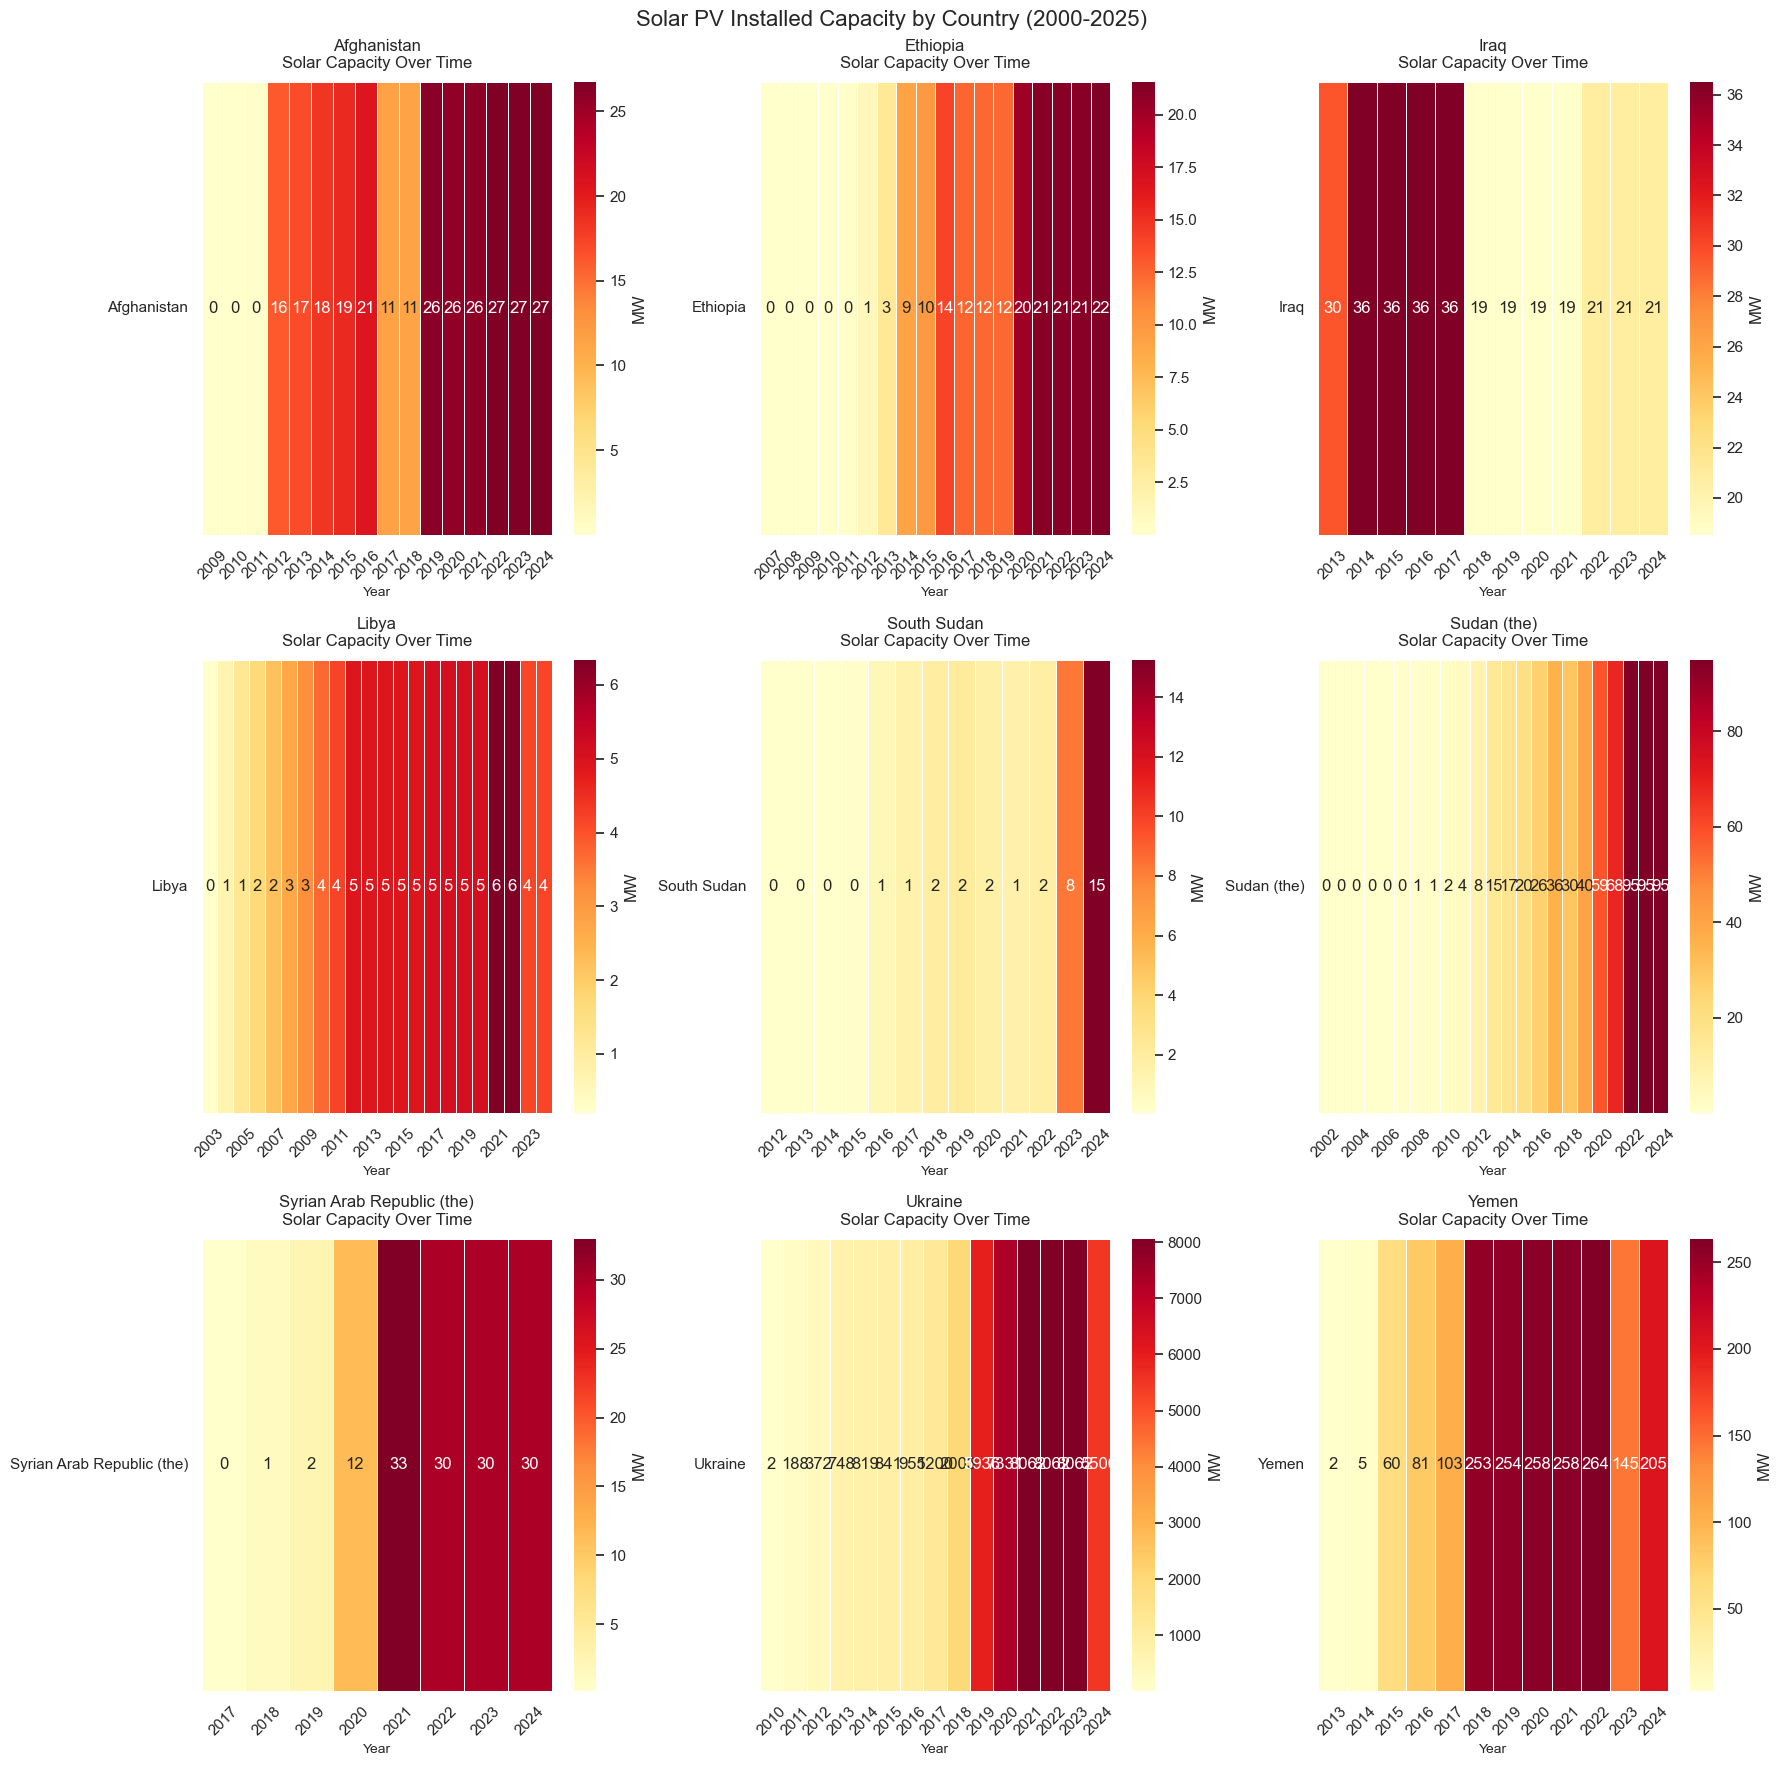


SUMMARY STATISTICS FOR ALL COUNTRIES

Countries ranked by maximum solar capacity:
Ukraine         | Max:     8062 MW | Latest:     5500 MW | Growth: High
Yemen           | Max:      270 MW | Latest:      270 MW | Growth: High
Sudan (the)     | Max:      136 MW | Latest:      136 MW | Growth: High
Syrian Arab Republic (the) | Max:       58 MW | Latest:        2 MW | Growth: Low
Iraq            | Max:       39 MW | Latest:       39 MW | Growth: Low
Afghanistan     | Max:       32 MW | Latest:       22 MW | Growth: Low
South Sudan     | Max:       28 MW | Latest:        2 MW | Growth: Low
Ethiopia        | Max:       22 MW | Latest:       22 MW | Growth: Low
Libya           | Max:        6 MW | Latest:        6 MW | Growth: Low

What each heatmap shows:
- Each row represents the country
- Each column represents a year
- Colors show capacity: Light = Low, Dark = High
- Numbers in cells show exact MW values
- You can see each country's growth pattern individually


In [48]:
# Creating Individual Heatmaps for Each Country
# This creates a separate heatmap for each country to show their solar growth pattern

# Step 1: Get all countries in our data
countries = solar_df["Country"].unique()
print("Countries in our dataset:", countries)
print("Total countries:", len(countries))

# Step 2: Set up the grid for multiple heatmaps
# Calculate how many rows and columns we need
num_countries = len(countries)
cols = 3  # 3 heatmaps per row
rows = (num_countries + cols - 1) // cols  # Calculate rows needed

print(f"\nCreating {rows} rows × {cols} columns grid for {num_countries} countries")

# Create a large figure to hold all heatmaps
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))

# Make sure axes is always a 2D array for easier handling
if rows == 1:
    axes = axes.reshape(1, -1)
elif cols == 1:
    axes = axes.reshape(-1, 1)

# Step 3: Create a heatmap for each country
for i, country in enumerate(countries):
    # Calculate which row and column this heatmap goes in
    row = i // cols
    col = i % cols

    print(f"\nProcessing {country} (position {i + 1}/{num_countries})")

    # Step 3a: Get data for this specific country
    country_data = solar_df[solar_df["Country"] == country].copy()

    # Step 3b: Prepare data for heatmap
    # For individual countries, we can show capacity by year in different ways
    # Option 1: Show as a single row (1 country × multiple years)

    # Create a pivot table for this country
    country_pivot = country_data.pivot_table(
        index="Country",
        columns="Year",
        values="Electricity Installed Capacity (MW)",
        fill_value=0,
    )

    # Step 3c: Create the heatmap for this country
    sns.heatmap(
        country_pivot,
        annot=True,  # Show numbers in each cell
        fmt=".0f",  # Show whole numbers
        cmap="YlOrRd",  # Yellow to Red color scheme
        cbar_kws={"label": "MW"},  # Color bar label
        ax=axes[row, col],  # Which subplot to use
        linewidths=0.5,  # Lines between cells
        square=False,  # Don't force square cells
    )

    # Step 3d: Format this heatmap
    axes[row, col].set_title(
        f"{country}\nSolar Capacity Over Time", fontsize=12, pad=10
    )
    axes[row, col].set_xlabel("Year", fontsize=10)
    axes[row, col].set_ylabel(
        "", fontsize=10
    )  # Remove y-label since it's just the country name

    # Rotate x-axis labels for better readability
    axes[row, col].tick_params(axis="x", rotation=45)
    axes[row, col].tick_params(axis="y", rotation=0)

    # Step 3e: Show some stats for this country
    max_capacity = country_data["Electricity Installed Capacity (MW)"].max()
    max_year = country_data.loc[
        country_data["Electricity Installed Capacity (MW)"].idxmax(), "Year"
    ]
    print(f"  - Peak capacity: {max_capacity:.0f} MW in {max_year}")

# Step 4: Hide any unused subplots
for i in range(num_countries, rows * cols):
    row = i // cols
    col = i % cols
    axes[row, col].set_visible(False)

# Step 5: Add main title and formatting
fig.suptitle("Solar PV Installed Capacity by Country (2000-2025)", fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)  # Make room for main title

# Step 6: Show the result
plt.show()

# Step 7: Create summary statistics
print("\n" + "=" * 50)
print("SUMMARY STATISTICS FOR ALL COUNTRIES")
print("=" * 50)

summary_stats = []
for country in countries:
    country_data = solar_df[solar_df["Country"] == country]

    stats = {
        "Country": country,
        "Max Capacity (MW)": country_data["Electricity Installed Capacity (MW)"].max(),
        "Min Capacity (MW)": country_data["Electricity Installed Capacity (MW)"].min(),
        "Latest Year": country_data["Year"].max(),
        "Latest Capacity (MW)": country_data[
            country_data["Year"] == country_data["Year"].max()
        ]["Electricity Installed Capacity (MW)"].iloc[0],
        "Growth Rate": "High"
        if country_data["Electricity Installed Capacity (MW)"].max() > 100
        else "Low",
    }
    summary_stats.append(stats)

# Convert to DataFrame for nice display
summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.sort_values("Max Capacity (MW)", ascending=False)

print("\nCountries ranked by maximum solar capacity:")
for _, row in summary_df.iterrows():
    print(
        f"{row['Country']:15} | Max: {row['Max Capacity (MW)']:8.0f} MW | Latest: {row['Latest Capacity (MW)']:8.0f} MW | Growth: {row['Growth Rate']}"
    )

print("\nWhat each heatmap shows:")
print("- Each row represents the country")
print("- Each column represents a year")
print("- Colors show capacity: Light = Low, Dark = High")
print("- Numbers in cells show exact MW values")
print("- You can see each country's growth pattern individually")

**Key Finding**:

 **Afghanistan**
- Very limited solar capacity throughout the entire period (2000-2025)
- Minimal growth with capacity remaining near 0 MW across all years
- No significant solar development visible

 **Ethiopia** 
- Extremely low solar capacity until around 2019-2020
- Sudden dramatic increase starting around 2020-2021
- Peak capacity appears to reach 20+ MW by 2025
- Represents one of the most dramatic growth trajectories shown

 **Iraq**
- Moderate solar development starting around 2018-2019
- Steady growth acceleration from 2019 onwards
- Capacity reaches approximately 35+ MW by 2025
- Shows consistent upward trend in recent years

 **Libya**
- Minimal solar capacity for most of the period
- Some development starting around 2015-2017
- Gradual increase reaching approximately 6 MW by 2025
- Relatively modest growth compared to other countries

 **South Sudan**
- Very limited solar development throughout most years
- Slight increase starting around 2020-2021
- Capacity reaches approximately 14-15 MW by 2025
- Shows recent acceleration but from a very low base

 **Sudan (the)**
- Minimal capacity through most of the period
- Significant acceleration starting around 2018-2019
- Dramatic growth reaching 90+ MW by 2025
- One of the highest absolute capacities shown

 **Syrian Arab Republic (the)**
- Very low solar capacity through 2020
- Moderate development starting around 2021
- Reaches approximately 30 MW by 2025
- Shows recent growth momentum

 **Ukraine**
- Extremely rapid and dramatic growth starting around 2019
- Massive capacity expansion reaching 8000+ MW by peak years
- By far the highest capacity among all countries shown
- Represents exponential growth trajectory

 **Yemen**
- Gradual development starting around 2015
- Steady growth acceleration from 2018 onwards
- Capacity reaches approximately 250 MW by 2025
- Shows consistent upward momentum

#### Overall Patterns
- Most countries show minimal solar development before 2015-2018
- Rapid acceleration occurs primarily in the 2019-2025 period
- Ukraine dominates with massive capacity (8000+ MW)
- Several countries (Ethiopia, Sudan, Iraq) show dramatic recent growth
- The period 2020-2025 represents the major solar expansion phase for most countries

SOLAR PV CAPACITY GROWTH RATE STATISTICS BY GROUP

Ukraine (Massive Scale Leader) Growth Rate Statistics:
Range: -31.8% to 500.0%
Mean: 65.9%
Median: 2.7%
--------------------------------------------------

High-Growth Success Stories Growth Rate Statistics:
Range: -45.0% to 500.0%
Mean: 60.2%
Median: 32.2%
--------------------------------------------------

Rapid Recent Accelerators Growth Rate Statistics:
Range: -49.2% to 500.0%
Mean: 58.7%
Median: 0.9%
--------------------------------------------------

Moderate Late Adopters Growth Rate Statistics:
Range: -24.6% to 500.0%
Mean: 71.6%
Median: 3.5%
--------------------------------------------------

Minimal Development Growth Rate Statistics:
Range: -44.8% to 500.0%
Mean: 56.6%
Median: 11.4%
--------------------------------------------------


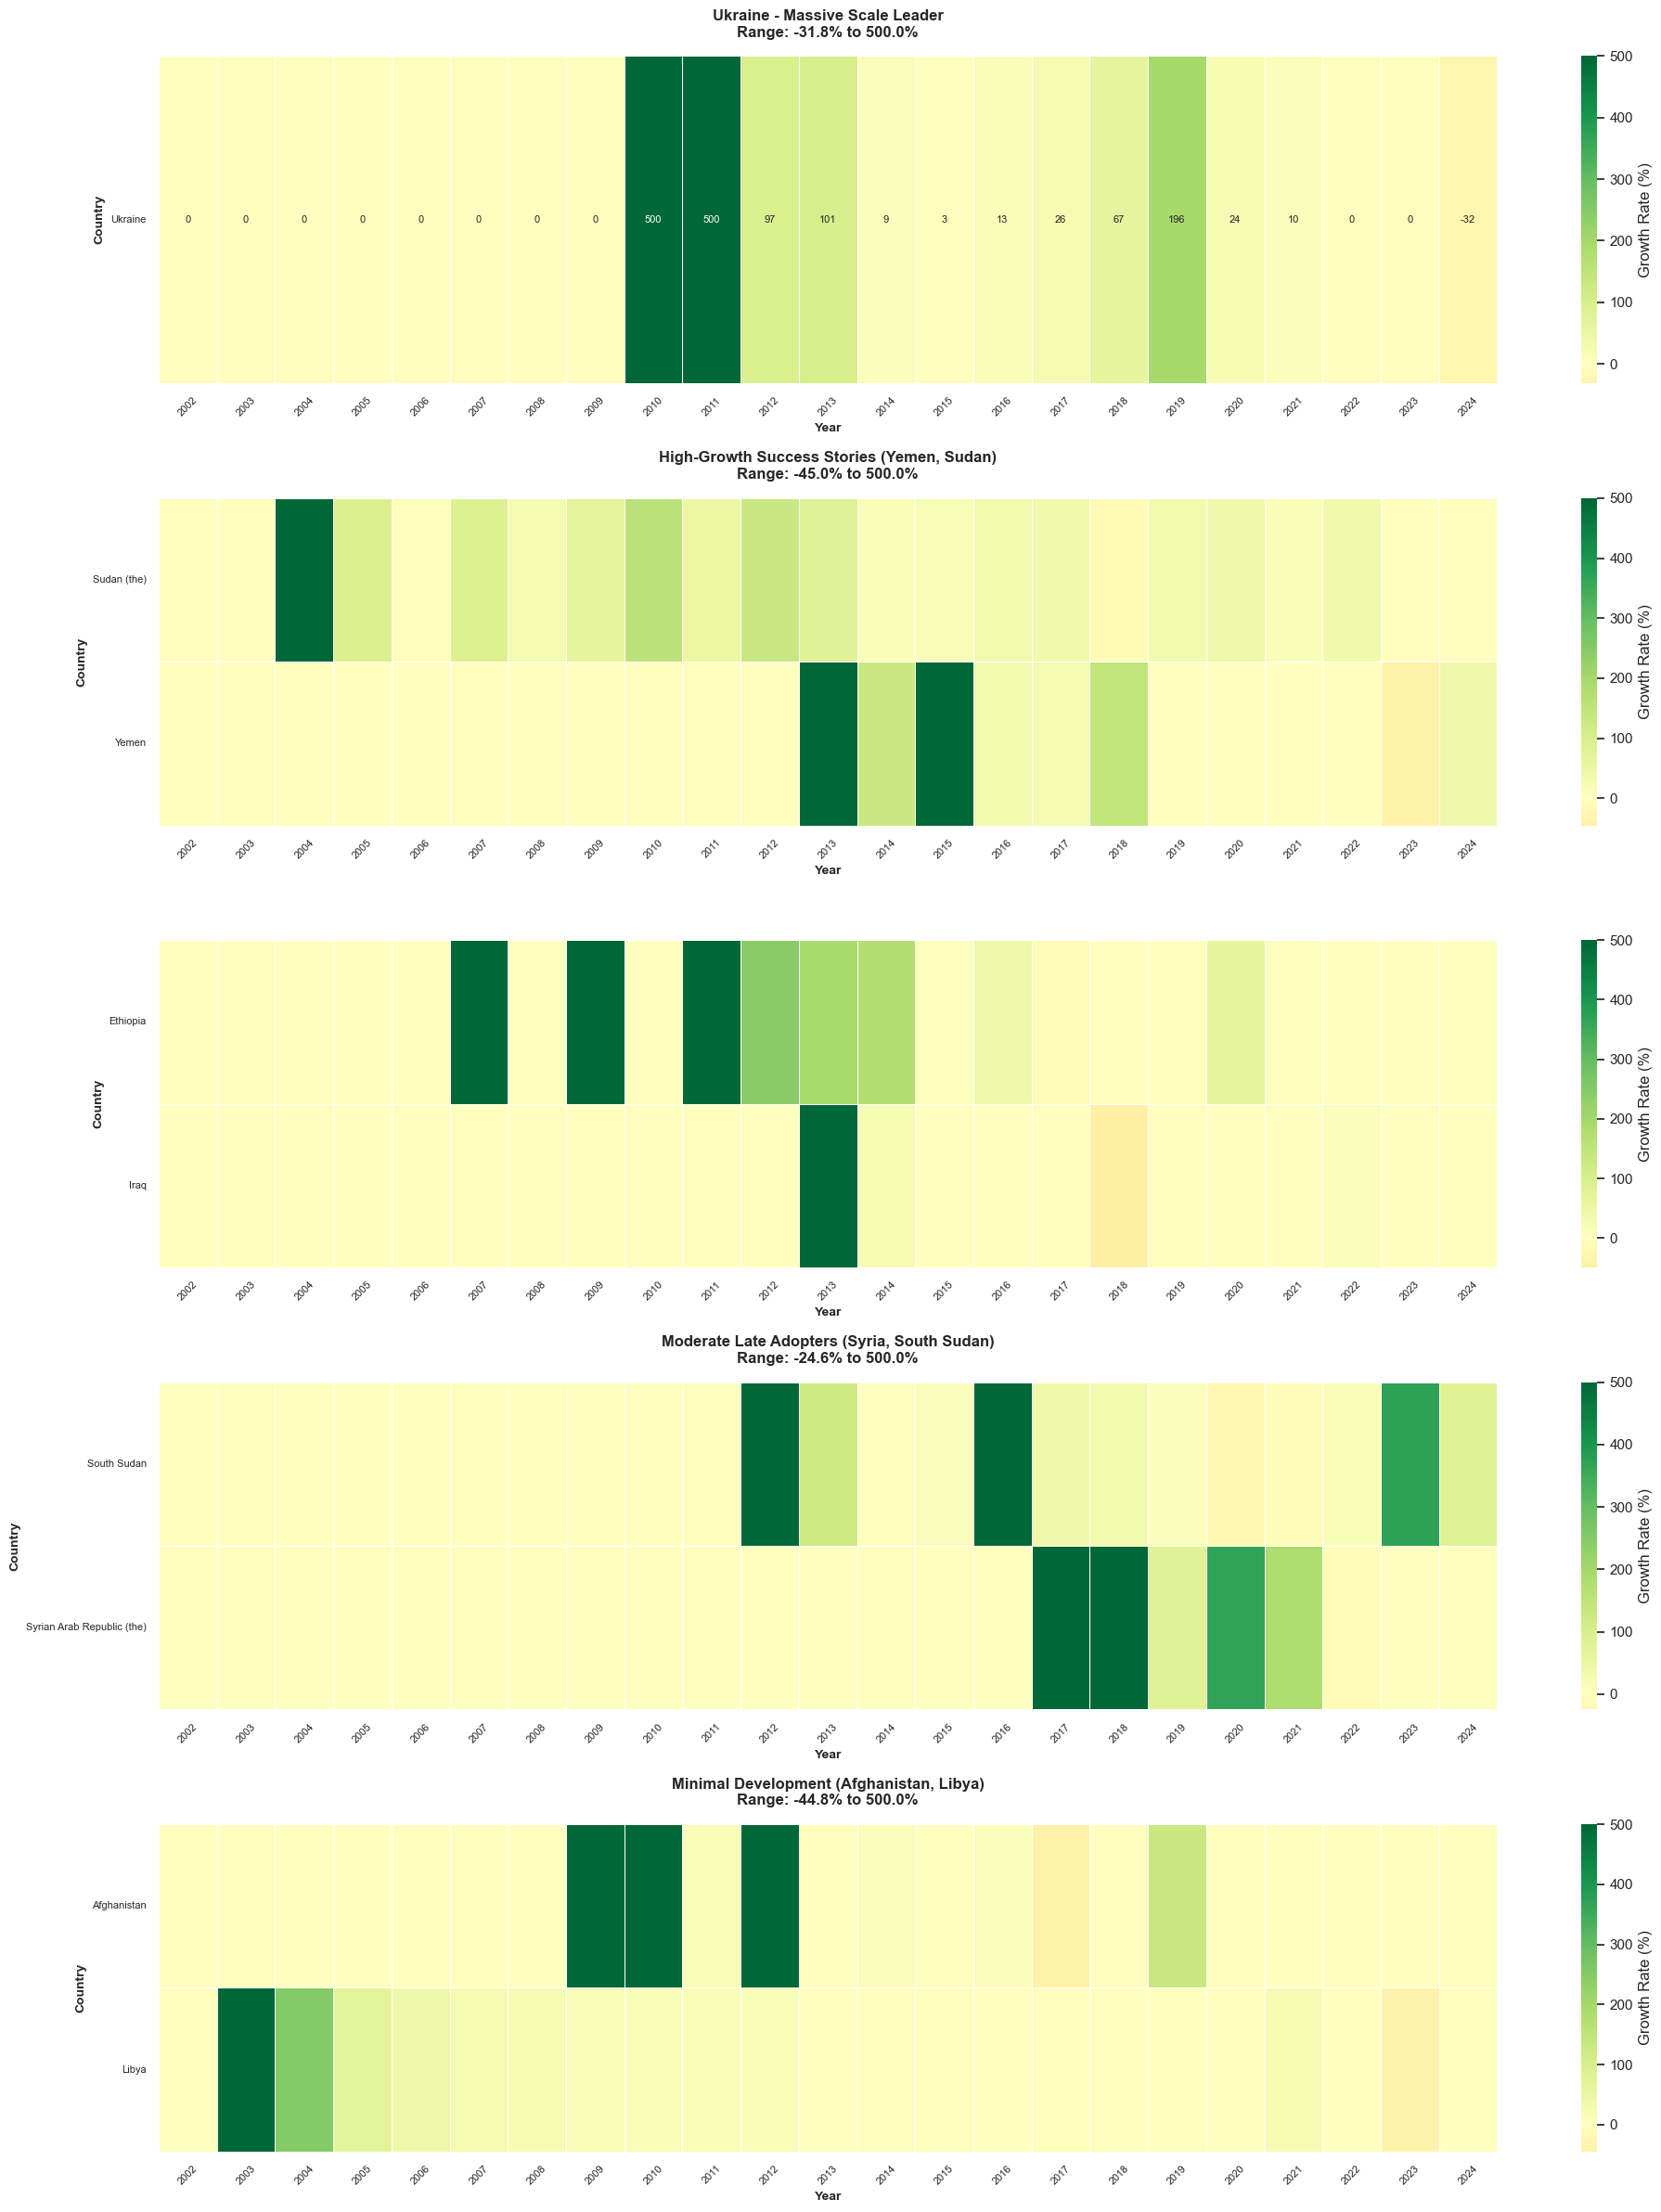


PEAK GROWTH YEARS BY COUNTRY:
Afghanistan: 2009 (500.0%)
Ethiopia: 2007 (500.0%)
Iraq: 2013 (500.0%)
Libya: 2003 (500.0%)
South Sudan: 2012 (500.0%)
Sudan (the): 2004 (500.0%)
Syrian Arab Republic (the): 2017 (500.0%)
Ukraine: 2010 (500.0%)
Yemen: 2013 (500.0%)

YEARS WITH HIGHEST OVERALL GROWTH ACTIVITY:
2013: 166.9% average growth
2012: 165.2% average growth
2010: 130.3% average growth
2009: 120.8% average growth
2011: 120.6% average growth


In [ ]:
# SOLAR PV CAPACITY GROWTH RATE HEATMAPS
# Map 1: Ukraine only
# Map 2: All other countries grouped by similar patterns

# Assume solar_df is already loaded with columns: Country, Year, Electricity Installed Capacity (MW)

# Step 1: Prepare the data for heatmap format
heatmap_data = solar_df.pivot_table(
    index="Country",
    columns="Year",
    values="Electricity Installed Capacity (MW)",
    fill_value=0,
)


# Step 2: Calculate year-over-year growth rates (improved version)
def calculate_growth_rates(data):
    growth_data = data.copy()

    # Initialize first year as 0 (no growth calculation possible)
    growth_data.iloc[:, 0] = 0

    for country in growth_data.index:
        for i in range(1, len(growth_data.columns)):
            prev_year = growth_data.columns[i - 1]
            curr_year = growth_data.columns[i]

            prev_capacity = data.loc[
                country, prev_year
            ]  # Use original data for calculation
            curr_capacity = data.loc[country, curr_year]

            # Calculate percentage growth
            if prev_capacity == 0:
                if curr_capacity > 0:
                    # New installation - set to high growth value
                    growth_data.loc[country, curr_year] = (
                        500  # Cap at 500% for visualization
                    )
                else:
                    growth_data.loc[country, curr_year] = 0
            else:
                growth_rate = ((curr_capacity - prev_capacity) / prev_capacity) * 100
                # Cap extreme values for better visualization
                growth_data.loc[country, curr_year] = min(max(growth_rate, -100), 500)

    return growth_data


# Calculate growth rates for all data
all_growth_data = calculate_growth_rates(heatmap_data)

# Step 3: Group countries by similar patterns
# Group 1: Ukraine only (massive scale)
ukraine_growth = all_growth_data[all_growth_data.index == "Ukraine"]

# Group 2: High-Growth Success Stories (Yemen, Sudan)
group2_countries = ["Yemen", "Sudan (the)"]
group2_growth = all_growth_data[all_growth_data.index.isin(group2_countries)]

# Group 3: Rapid Recent Accelerators (Ethiopia, Iraq)
group3_countries = ["Ethiopia", "Iraq"]
group3_growth = all_growth_data[all_growth_data.index.isin(group3_countries)]

# Group 4: Moderate Late Adopters (Syria, South Sudan)
group4_countries = ["Syrian Arab Republic (the)", "South Sudan"]
group4_growth = all_growth_data[all_growth_data.index.isin(group4_countries)]

# Group 5: Minimal Development (Afghanistan, Libya)
group5_countries = ["Afghanistan", "Libya"]
group5_growth = all_growth_data[all_growth_data.index.isin(group5_countries)]


# Function to print growth rate statistics
def print_growth_stats(data, group_name):
    print(f"\n{group_name} Growth Rate Statistics:")
    print(f"Range: {data.min().min():.1f}% to {data.max().max():.1f}%")
    print(f"Mean: {data.mean().mean():.1f}%")
    print(f"Median: {data.median().median():.1f}%")
    print("-" * 50)


# Print statistics for each group
print("SOLAR PV CAPACITY GROWTH RATE STATISTICS BY GROUP")
print("=" * 60)
print_growth_stats(ukraine_growth, "Ukraine (Massive Scale Leader)")
print_growth_stats(group2_growth, "High-Growth Success Stories")
print_growth_stats(group3_growth, "Rapid Recent Accelerators")
print_growth_stats(group4_growth, "Moderate Late Adopters")
print_growth_stats(group5_growth, "Minimal Development")

# Create figure with five subplots vertically stacked
fig, axes = plt.subplots(5, 1, figsize=(20, 24))

# Common heatmap parameters
heatmap_params = {
    "cmap": "RdYlGn",
    "center": 0,
    "linewidths": 0.5,
    "linecolor": "white",
    "square": False,
    "fmt": ".0f",
}

# Map 1: Ukraine heatmap (top)
sns.heatmap(
    ukraine_growth,
    annot=True,
    annot_kws={"fontsize": 8},
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[0],
    **heatmap_params,
)
axes[0].set_title(
    f"Ukraine - Massive Scale Leader\nRange: {ukraine_growth.min().min():.1f}% to {ukraine_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

# Map 2: High-Growth Success Stories
sns.heatmap(
    group2_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[1],
    **heatmap_params,
)
axes[1].set_title(
    f"High-Growth Success Stories (Yemen, Sudan)\nRange: {group2_growth.min().min():.1f}% to {group2_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

# Map 3: Rapid Recent Accelerators
sns.heatmap(
    group3_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[2],
    **heatmap_params,
)
axes[3].set_title(
    f"Rapid Recent Accelerators (Ethiopia, Iraq)\nRange: {group3_growth.min().min():.1f}% to {group3_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

# Map 4: Moderate Late Adopters
sns.heatmap(
    group4_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[3],
    **heatmap_params,
)
axes[3].set_title(
    f"Moderate Late Adopters (Syria, South Sudan)\nRange: {group4_growth.min().min():.1f}% to {group4_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

# Map 5: Minimal Development
sns.heatmap(
    group5_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[4],
    **heatmap_params,
)
axes[4].set_title(
    f"Minimal Development (Afghanistan, Libya)\nRange: {group5_growth.min().min():.1f}% to {group5_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

# Customize all axes
for i, ax in enumerate(axes):
    ax.set_xlabel("Year", fontsize=10, fontweight="bold")
    ax.set_ylabel("Country", fontsize=10, fontweight="bold")
    ax.tick_params(axis="x", rotation=45, labelsize=8)
    ax.tick_params(axis="y", rotation=0, labelsize=8)

plt.tight_layout()
plt.show()

# Additional analysis: Find peak growth years for each country
print("\nPEAK GROWTH YEARS BY COUNTRY:")
print("=" * 40)
for country in all_growth_data.index:
    country_data = all_growth_data.loc[country]
    max_growth_year = country_data.idxmax()
    max_growth_rate = country_data.max()
    print(f"{country}: {max_growth_year} ({max_growth_rate:.1f}%)")

# Find years with highest overall growth activity
print("\nYEARS WITH HIGHEST OVERALL GROWTH ACTIVITY:")
print("=" * 50)
yearly_avg_growth = all_growth_data.mean()
top_growth_years = yearly_avg_growth.nlargest(5)
for year, avg_growth in top_growth_years.items():
    print(f"{year}: {avg_growth:.1f}% average growth")

**Key Findings:**

 **When Countries Started Building Solar Power**

 **Time Periods**
1. **2009-2010**: Ukraine and Afghanistan started big projects
2. **2004-2006**: Sudan began building solar power
3. **2018-2022**: Yemen and Iraq got serious about solar
4. **2020-2025**: Syria and South Sudan joined in recently

 **How Fast They Grew**

 **Growth Speed**
- **500% growth**: Means they built A LOT very quickly (like going from 1 to 5 solar farms)
- **Steady vs. Stop-and-Go**: Ukraine and Yemen kept building consistently; others built in short bursts then stopped
- **Negative growth**: Sometimes they had less solar power than before (maybe some broke down)

 **Three Waves of Countries**

 **The Waves**
1. **Early Starters** (2004-2010): Sudan, Ukraine, Ethiopia went first
2. **Middle Joiners** (2015-2018): Syria, South Sudan joined later
3. **Recent Joiners** (2018-2025): Yemen, Iraq are newest
4. **Barely Tried**: Afghanistan, Libya hardly built any solar

 **Main Point**
All countries can grow solar power really fast when they start (500% growth), but most countries only did it for a short time and then stopped. Ukraine was the only one that kept building solar power for many years, which is why they have so much more than everyone else.